In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white.

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('train.csv')
data.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [4]:
## Droping  row_id column-- which doesnt seem to have much use.
data.drop('row_id', axis=1, inplace=True)

## Creating individual columns for time column(1991-04-01 03:20:00 --- year-month-day  Hours:minutes:seconds)
data['year'] = data['time'].apply(lambda row: row[:4])
data['month'] = data['time'].apply(lambda row: row.split('-')[1][:2] )
data['date'] = data['time'].apply(lambda row: row.split('-')[2][:2])
data['hour'] = data['time'].apply(lambda row: row.split(':')[0][-2:] )
data['c_date'] = data['time'].apply(lambda row: row.split(' ')[0])

## Chainging dataframe dtypes
data = data.astype({'year':'int64','month':'int64', 'date':'int64',
                    'x':'str','y':'str', 'direction':'str', 'hour':'int64' })

## Creating new _column by combining x,y,& direction.
data['highway_code']= data['x']+data['y']+data['direction']

## Creating new column is_weekday
dt_list = []
for i,j in enumerate(data['c_date']):
    day_type = datetime.date(data['year'].iloc[i],data['month'].iloc[i],data['date'].iloc[i])
    dy = day_type.weekday()
    dt_list.append(dy)
data['is_weekday'] = dt_list

## Categorizing is_weekday column 0-Weekday, 1-Weekend
data['is_weekday'] = pd.cut(data['is_weekday'], bins=[-1,4,6], labels = [0, 1])

## Categorizing new column based on day timings
data['m_a_e_n'] = pd.cut(data['hour'], bins=[4,11,16,21], labels = [0, 1,2])
data = data.astype({'m_a_e_n':'float64'})
data['m_a_e_n'].fillna(3, inplace=True)
data = data.astype({'m_a_e_n':'int64'})

## Encoding the highway code
le = LabelEncoder()
data['highway_code']= le.fit_transform(data['highway_code'])



In [5]:
data = data.astype({'is_weekday':'int64', 'highway_code':'int64'})
data.drop(['time','x','y','direction','c_date'], axis=1,inplace=True)
data.head(10)

,congestion,year,month,date,hour,highway_code,is_weekday,m_a_e_n
0,70,1991,4,1,0,0,0,3
1,49,1991,4,1,0,1,0,3
2,24,1991,4,1,0,2,0,3
3,18,1991,4,1,0,3,0,3
4,60,1991,4,1,0,4,0,3
5,58,1991,4,1,0,5,0,3
6,26,1991,4,1,0,6,0,3
7,31,1991,4,1,0,7,0,3
8,49,1991,4,1,0,8,0,3
9,46,1991,4,1,0,9,0,3


<AxesSubplot:>

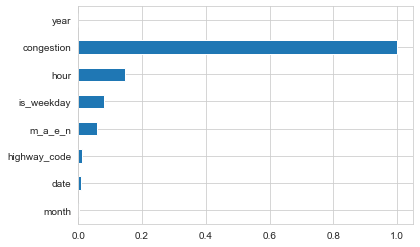

In [6]:
data.corr()['congestion'].abs().sort_values().plot(kind = 'barh')

In [7]:
data.isnull().sum()

congestion      0
year            0
month           0
date            0
hour            0
highway_code    0
is_weekday      0
m_a_e_n         0
dtype: int64

In [8]:
data['highway_code'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype=int64)

In [10]:
data.to_csv('fe_modified.csv')
data.head(10)

,congestion,year,month,date,hour,highway_code,is_weekday,m_a_e_n
0,70,1991,4,1,0,0,0,3
1,49,1991,4,1,0,1,0,3
2,24,1991,4,1,0,2,0,3
3,18,1991,4,1,0,3,0,3
4,60,1991,4,1,0,4,0,3
5,58,1991,4,1,0,5,0,3
6,26,1991,4,1,0,6,0,3
7,31,1991,4,1,0,7,0,3
8,49,1991,4,1,0,8,0,3
9,46,1991,4,1,0,9,0,3
